# pRF-fitting with HRF

The goal of this notebook is to try out how prfpy deals with fitting the HRF. This could be cool in the context of laminar pRFs, where we then also have laminar HRFs. Few thoughts on this though: yes, it's cool, but what exactly are we doing? My understanding of the dispersion/derivatives is to shift the HRF with respect to time, but the pRF model also inherently does this by changing the pRF-parameters, right? Whether a prediction fits or not can depend both on the HRF not being accurate, as well as the pRF-parameters; for that latter, if the prediction is slightly shifted, it could mean that we're dealing with a pRF that is slight further in space with respect to the design matrix:

EDIT: because of small, symmetrical differences in timing as the bar moves from different sides. Only a symmetric widening of the HRF could have the same effect as increasing the size of the pRF. There will be structural differences in predicted timecourse when this widening/narrowing is not symmetrical. This means, however, that there are cases where the HRF and sigma compensate for one another, which warrants caution: first fit the spatial parameters with the canonical HRF, then fit the HRF by injecting those parameters.

For now, I will use a timecourse from a validated pRF (e.g., the timecourse of `sub-005`'s best vertex) to limit processing time

In [86]:
# some imports
from linescanning import utils, plotting, prf
from pRFline import fitting
import numpy as np
import warnings
import matplotlib.pyplot as plt
import os
import seaborn as sns
opj = os.path.join

warnings.simplefilter('ignore')
project_dir = os.environ.get("DIR_PROJECTS")
base_dir = os.path.join(project_dir, 'hemifield')
deriv_dir = opj(base_dir, 'derivatives')

plot_vox = 359
plot_xkcd = False

In [31]:
# load data
sub = "sub-005"
pars = utils.get_file_from_substring(["model-gauss", "stage-iter", "params"], opj(deriv_dir, 'prf', sub, 'ses-1'))
results = fitting.pRFResults(pars, verbose=True, TR=1.5)

Loading in files:
 pRF params:    /data1/projects/MicroFunc/Jurjen/projects/hemifield/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_model-gauss_stage-iter_desc-prf_params.npy
 Design matrix: /data1/projects/MicroFunc/Jurjen/projects/hemifield/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_desc-design_matrix.mat
 fMRI data:     /data1/projects/MicroFunc/Jurjen/projects/hemifield/derivatives/prf/sub-005/ses-1/sub-005_ses-1_task-2R_desc-data.npy
Setting rsq-threshold to default value: 0.1
Using settings file: /data1/projects/MicroFunc/Jurjen/projects/hemifield/derivatives/prf/sub-005/ses-1/20220110_model-norm_desc-settings.yml


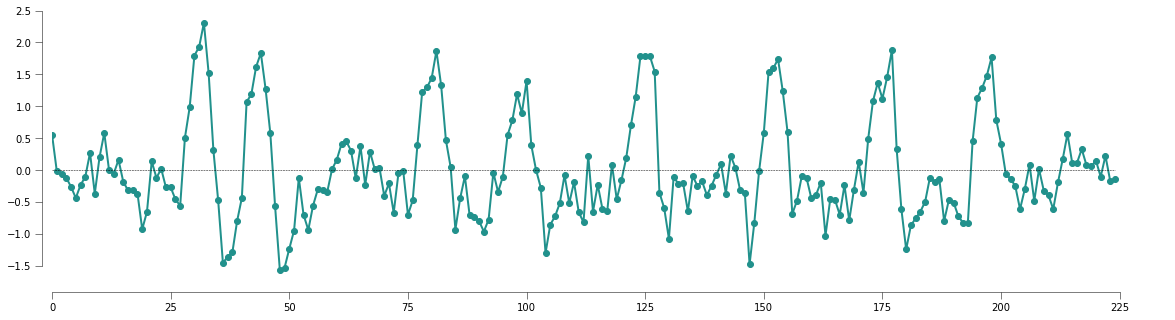

In [32]:
vox_nr = 2348
vox_data = results.data[:,vox_nr]
plotting.LazyPlot(vox_data, 
                  sns_trim=True, 
                  line_width=2, 
                  markers="o", 
                  add_hline='default',
                  figsize=(20,5))

In [4]:
# fit the 20 different HRFs from pybest
from scipy.io import loadmat
from scipy.interpolate import interp1d

hrf_ts = loadmat('/data1/projects/MicroFunc/Jurjen/programs/packages/pybest/pybest/data/hrf_ts.mat')['hrf_ts']
t = np.linspace(0, 50, hrf_ts.shape[0], endpoint=True)
f = interp1d(t, hrf_ts, axis=0)
t_low = np.linspace(0, 50, 51, endpoint=True)
hrf_ds = f(t_low)

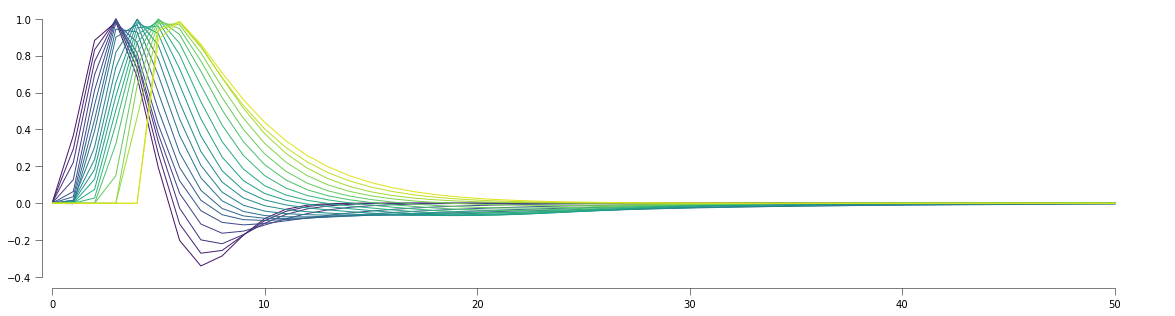

In [5]:
plotting.LazyPlot([hrf_ds[:,ii] for ii in range(hrf_ds.shape[-1])], xx=t_low, sns_trim=True, figsize=(20,5))

In [8]:
hrf_fitter = []
for hrf in range(hrf_ds.shape[-1]):
    print(f"Fitting with HRF #{hrf+1}")
    fitter = prf.pRFmodelFitting(vox_data[...,np.newaxis].T, 
                                 design_matrix=results.design, 
                                 TR=1.5, 
                                 model='norm', 
                                 stage='grid+iter', 
                                 verbose=False,
                                 hrf=hrf_ds[:,hrf][...,np.newaxis].T)
    fitter.fit()
    hrf_fitter.append(fitter)

Fitting with HRF #1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.1s finished


Norm iterfit completed at 2022/05/27 16:10:50. Mean rsq>0.1: 0.67
Iterfit took 0:02:42.782697
Fitting with HRF #2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.2s finished


Norm iterfit completed at 2022/05/27 16:47:05. Mean rsq>0.1: 0.72
Iterfit took 0:35:34.409826
Fitting with HRF #3


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.1s finished


Norm iterfit completed at 2022/05/27 16:51:24. Mean rsq>0.1: 0.75
Iterfit took 0:03:39.664899
Fitting with HRF #4


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.2s finished


Norm iterfit completed at 2022/05/27 16:56:06. Mean rsq>0.1: 0.78
Iterfit took 0:04:02.990970
Fitting with HRF #5


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.2s finished


Norm iterfit completed at 2022/05/27 17:31:55. Mean rsq>0.1: 0.78
Iterfit took 0:35:09.690219
Fitting with HRF #6


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.1s finished


Norm iterfit completed at 2022/05/27 17:39:25. Mean rsq>0.1: 0.76
Iterfit took 0:06:49.605163
Fitting with HRF #7


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.1s finished


Norm iterfit completed at 2022/05/27 18:15:43. Mean rsq>0.1: 0.73
Iterfit took 0:35:39.106878
Fitting with HRF #8


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.2s finished


Norm iterfit completed at 2022/05/27 18:52:10. Mean rsq>0.1: 0.68
Iterfit took 0:35:46.333369
Fitting with HRF #9


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.2s finished


Norm iterfit completed at 2022/05/27 18:57:19. Mean rsq>0.1: 0.63
Iterfit took 0:04:27.903254
Fitting with HRF #10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.1s finished


Norm iterfit completed at 2022/05/27 19:16:40. Mean rsq>0.1: 0.57
Iterfit took 0:18:40.295577
Fitting with HRF #11


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.3s finished


Norm iterfit completed at 2022/05/27 19:28:47. Mean rsq>0.1: 0.49
Iterfit took 0:11:23.051743
Fitting with HRF #12


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.3s finished


Norm iterfit completed at 2022/05/27 19:42:48. Mean rsq>0.1: 0.39
Iterfit took 0:13:14.497438
Fitting with HRF #13


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.3s finished


Norm iterfit completed at 2022/05/27 20:23:17. Mean rsq>0.1: 0.31
Iterfit took 0:39:47.798067
Fitting with HRF #14


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.6s finished


Norm iterfit completed at 2022/05/27 21:04:23. Mean rsq>0.1: 0.23
Iterfit took 0:40:17.707953
Fitting with HRF #15


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.3s finished


Norm iterfit completed at 2022/05/27 21:15:51. Mean rsq>0.1: 0.16
Iterfit took 0:10:43.223078
Fitting with HRF #16


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Norm iterfit completed at 2022/05/27 21:16:38. Mean rsq>0.1: nan
Iterfit took 0:00:00.000113
Fitting with HRF #17


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Norm iterfit completed at 2022/05/27 21:17:27. Mean rsq>0.1: nan
Iterfit took 0:00:00.000146
Fitting with HRF #18


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Norm iterfit completed at 2022/05/27 21:18:10. Mean rsq>0.1: nan
Iterfit took 0:00:00.000151
Fitting with HRF #19


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


Norm iterfit completed at 2022/05/27 21:18:52. Mean rsq>0.1: nan
Iterfit took 0:00:00.000097
Fitting with HRF #20
Norm iterfit completed at 2022/05/27 21:19:35. Mean rsq>0.1: nan
Iterfit took 0:00:00.000096


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


We can plot the max r2 (variance explained) of all the HRFs used and fetch which HRF was the best

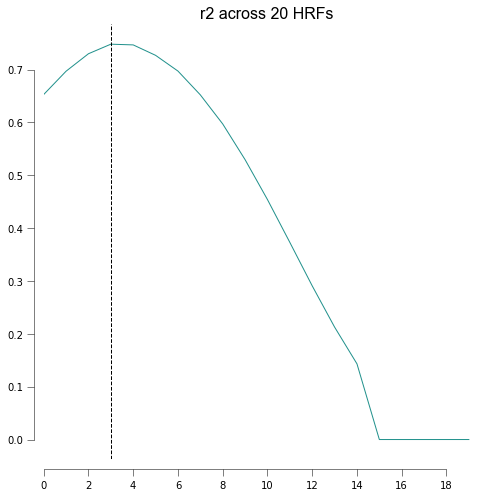

In [9]:
max_r2 = [hrf_fitter[ii].gauss_iter[0][-1] for ii in range(len(hrf_fitter))]
max_val = utils.find_nearest(max_r2, np.amax(max_r2))[0]
plotting.LazyPlot(np.array(max_r2), 
                  figsize=(8,8), 
                  sns_trim=True, 
                  add_vline={'pos': max_val, 'color': 'k', 'ls': '--', 'lw': 1},
                  title=f"r2 across {len(hrf_fitter)} HRFs",
                  font_size=16)

This is the predicted timecourse of the 'optimal' HRF

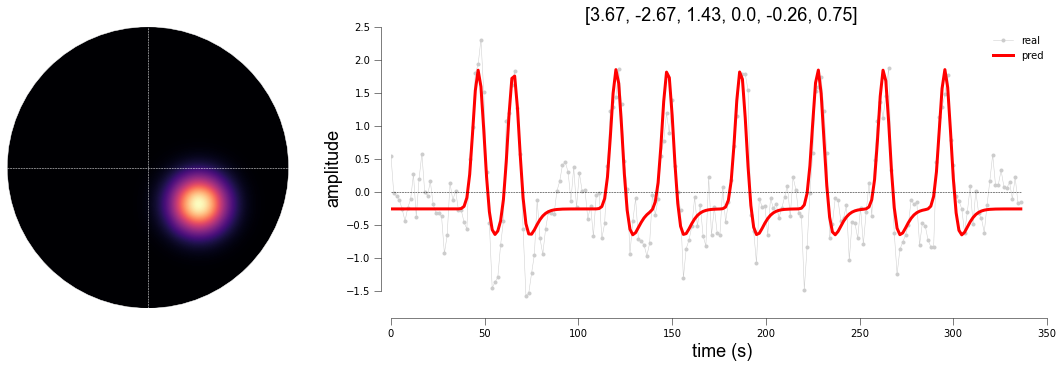

In [53]:
pred2 = hrf_fitter[max_val].plot_vox(model="gauss", axis_type="time", title="pars")[-1]

And this the old prediction

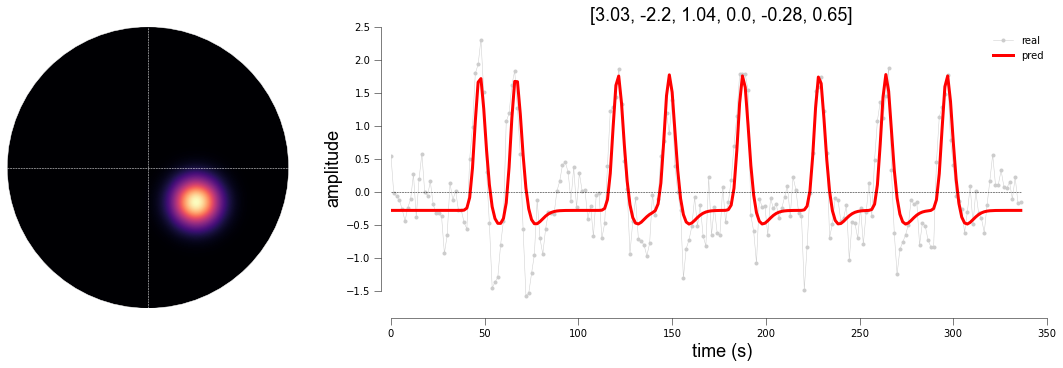

In [54]:
pred1 = results.model_fit.plot_vox(vox_nr=vox_nr, model='gauss', transpose=False, axis_type="time", title="pars")[-1]

That is an increase of about 10% explained variance. Interestingly, it doesn't seem to affect the pRF-parameters much. Aside from the variance explained, all other parameters are equal.

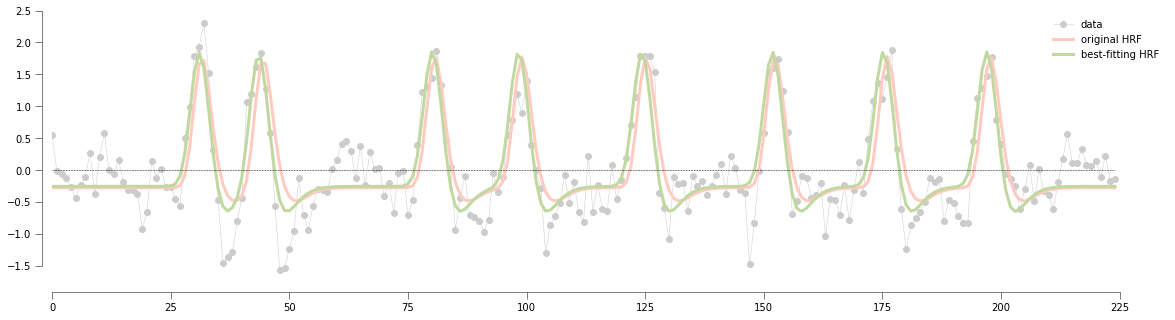

In [57]:
pred1 = results.model_fit.plot_vox(vox_nr=vox_nr, model='gauss', make_figure=False)[-1]
pred2 = hrf_fitter[max_val].plot_vox(model="gauss", make_figure=False)[-1]
plotting.LazyPlot([vox_data, pred1, pred2], 
                  sns_trim=True, 
                  markers=["o", None, None], 
                  labels=["data", "original HRF", "best-fitting HRF"],
                  line_width=[0.5,3,3],
                  color=["#cccccc", "#ffcbc1", "#c1d8a0"],
                  add_hline='default',
                  figsize=(20,5))

Check if fitting HRF with DN-model works if I turn off `gaussian_params`

In [58]:
# fit
print("Fitting with fit_hrf=True")
hrf_true_norm = prf.pRFmodelFitting(vox_data[...,np.newaxis].T, 
                                design_matrix=results.design, 
                                TR=1.5, 
                                model='norm', 
                                stage='grid+iter', 
                                verbose=True,
                                fit_hrf=True)
hrf_true_norm.fit()

Fitting with fit_hrf=True
Setting rsq-threshold to default value: 0.1
Starting gauss grid fit at 2022/05/28 13:35:56
Gaussian gridfit completed at 2022/05/28 13:36:45. voxels/vertices above 0.1: 1 out of 1
Gridfit took 0:00:48.336846
Mean rsq>0.1: 0.66
Starting gauss iterfit at 2022/05/28 13:36:45
Gaussian iterfit completed at 2022/05/28 13:36:47. Mean rsq>0.1: 0.66
Iterfit took 0:00:02.604178
Using settings file: /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/20220528_model-norm_desc-settings.yml
Starting norm grid fit at 2022/05/28 13:36:48


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.1s finished


Norm gridfit completed at 2022/05/28 13:36:50. Mean rsq>0.1: 0.68
Gridfit took 0:00:02.148629
Starting norm iterfit at 2022/05/28 13:36:50
Norm iterfit completed at 2022/05/28 13:42:12. Mean rsq>0.1: 0.78
Iterfit took 0:05:21.937390


In [59]:
hrf_false_norm = prf.pRFmodelFitting(vox_data[...,np.newaxis].T, 
                                design_matrix=results.design, 
                                TR=1.5, 
                                model='norm', 
                                stage='grid+iter', 
                                verbose=True,
                                fit_hrf=False)
hrf_false_norm.fit()

Setting rsq-threshold to default value: 0.1
Starting gauss grid fit at 2022/05/28 13:42:13
Gaussian gridfit completed at 2022/05/28 13:42:57. voxels/vertices above 0.1: 1 out of 1
Gridfit took 0:00:43.502418
Mean rsq>0.1: 0.66
Starting gauss iterfit at 2022/05/28 13:42:57
Gaussian iterfit completed at 2022/05/28 13:42:59. Mean rsq>0.1: 0.66
Iterfit took 0:00:02.507260
Using settings file: /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/20220528_model-norm_desc-settings.yml
Starting norm grid fit at 2022/05/28 13:43:00


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.2s finished


Norm gridfit completed at 2022/05/28 13:43:02. Mean rsq>0.1: 0.68
Gridfit took 0:00:02.171201
Starting norm iterfit at 2022/05/28 13:43:02
Norm iterfit completed at 2022/05/28 14:18:14. Mean rsq>0.1: 0.69
Iterfit took 0:35:12.548994


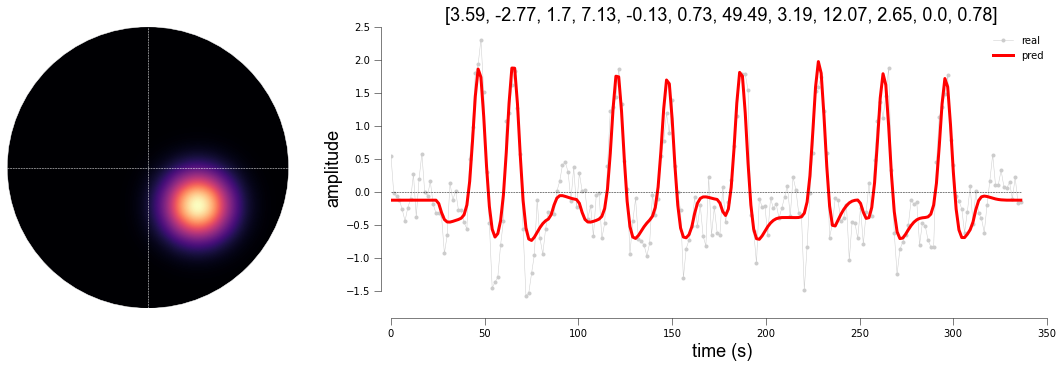

In [60]:
pred1,_,_ = hrf_true_norm.plot_vox(model='norm', sns_trim=True, axis_type="time", title="pars")

In [61]:
hrf = hrf_true_norm.norm_model.create_hrf(hrf_params=[1,2.05,0]).T

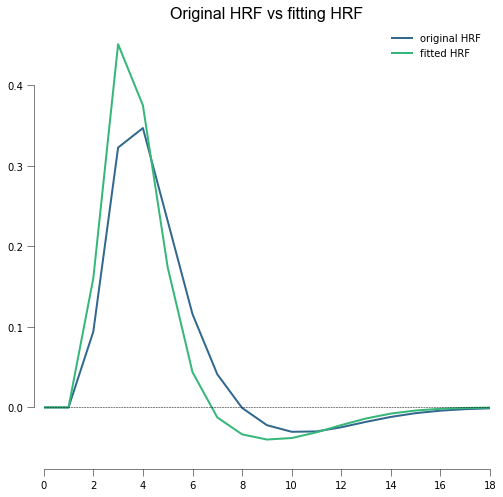

In [62]:
plotting.LazyPlot([hrf_true_norm.norm_model.hrf[0], hrf], 
                  labels=['original HRF', 'fitted HRF'], 
                  figsize=(8,8), 
                  sns_trim=True,
                  title=f"Original HRF vs fitting HRF",
                  font_size=16,
                  line_width=2,
                  x_lim=[0,18],
                  add_hline='default')

Fitting on line-scanning data (`sub-003_ses-4`) EDIT: this one had the wonky pRF

DATASET

FUNCTIONAL
Preprocessing /data1/projects/MicroFunc/Jurjen/projects/hemifield/sub-003/ses-4/func/sub-003_ses-4_task-pRF_run-4_bold.mat
 Filtering strategy: 'lp'
 Standardization strategy: 'psc'
 Cutting 0 volumes from beginning
 DCT-high pass filter [removes low frequencies <0.01 Hz]
 Source dir: /data1/projects/MicroFunc/Jurjen/projects/VE-pRF/derivatives/nighres/sub-003/ses-1
 Target session: ses-4
 Foldover: FH
 Ref slice: /data1/projects/MicroFunc/Jurjen/projects/hemifield/sub-003/ses-4/anat/sub-003_ses-4_acq-1slice_run-4_T1w.nii.gz
 Trafo's: ['/data1/projects/MicroFunc/Jurjen/projects/hemifield/derivatives/pycortex/sub-003/transforms/sub-003_from-ses1_to-ses4_rec-motion1_desc-genaff.mat', '/data1/projects/MicroFunc/Jurjen/projects/hemifield/sub-003/ses-4/anat/from-run2_to-run4.txt']
 Found 24 voxel for nuisance regression; (indices<300 are ignored due to distance from coil)
 We're good to go!
 Using 5 components for aCompCor (WM/CSF separately)
 Found 1 component(s) in 'cs

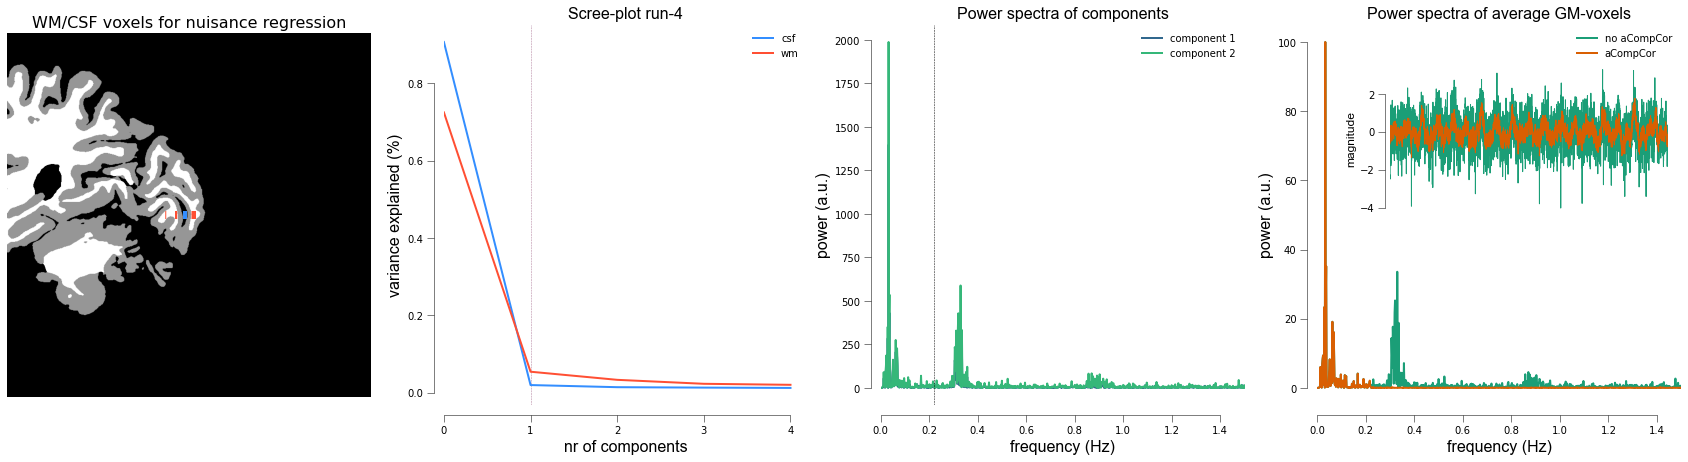

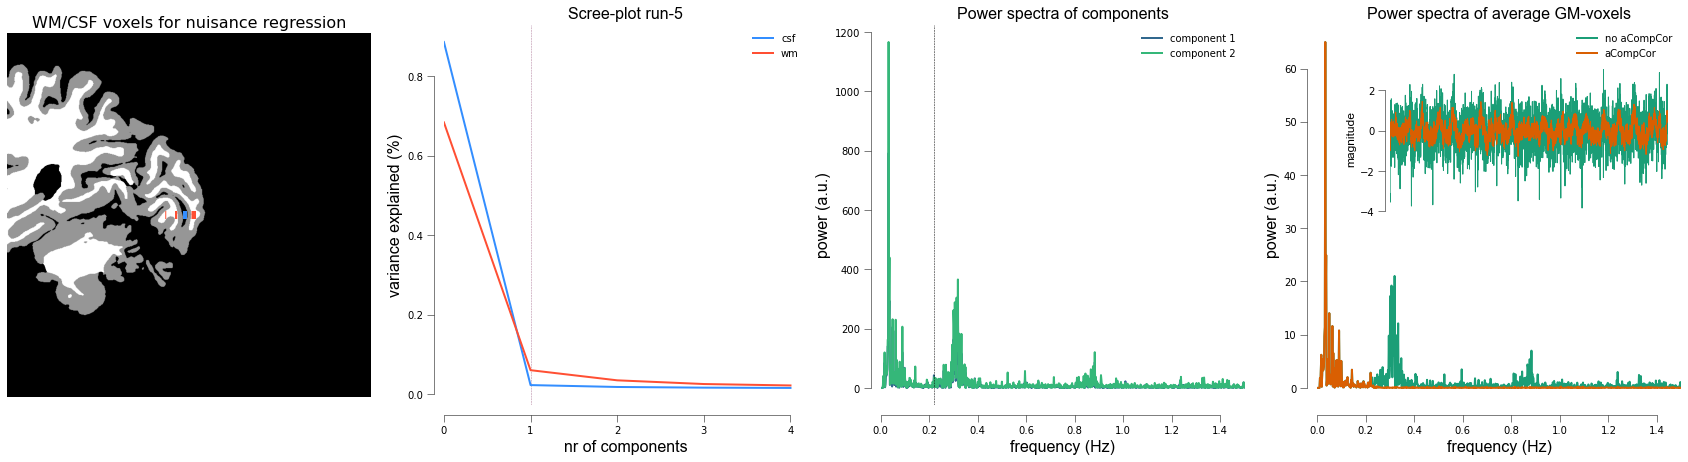

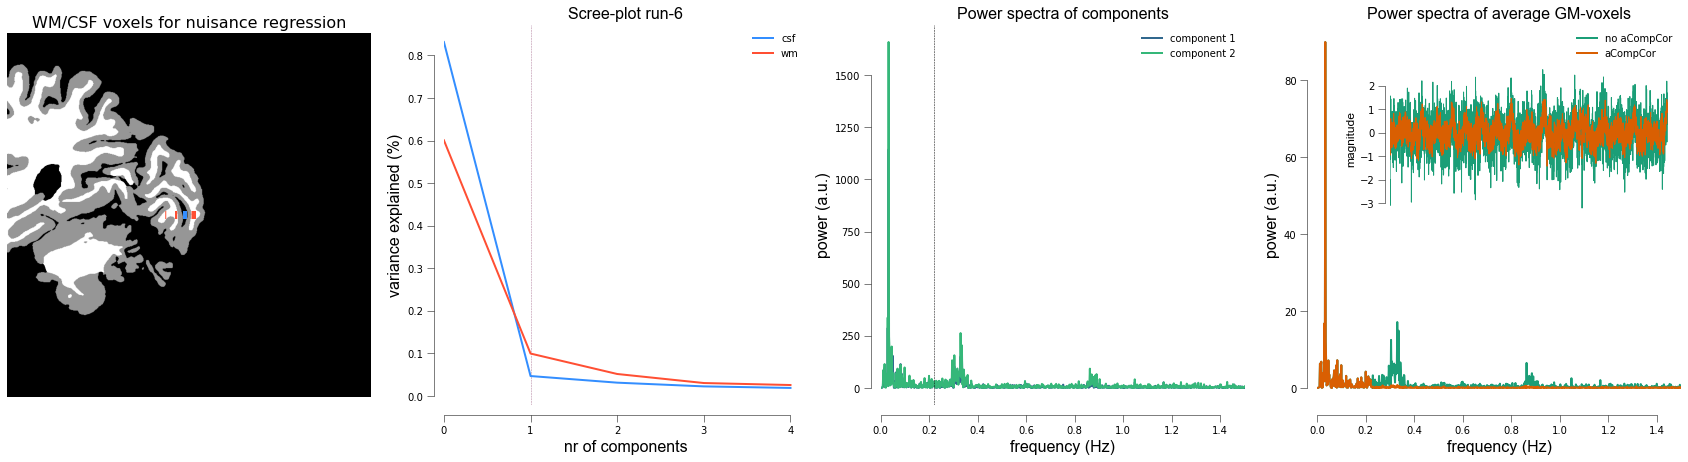

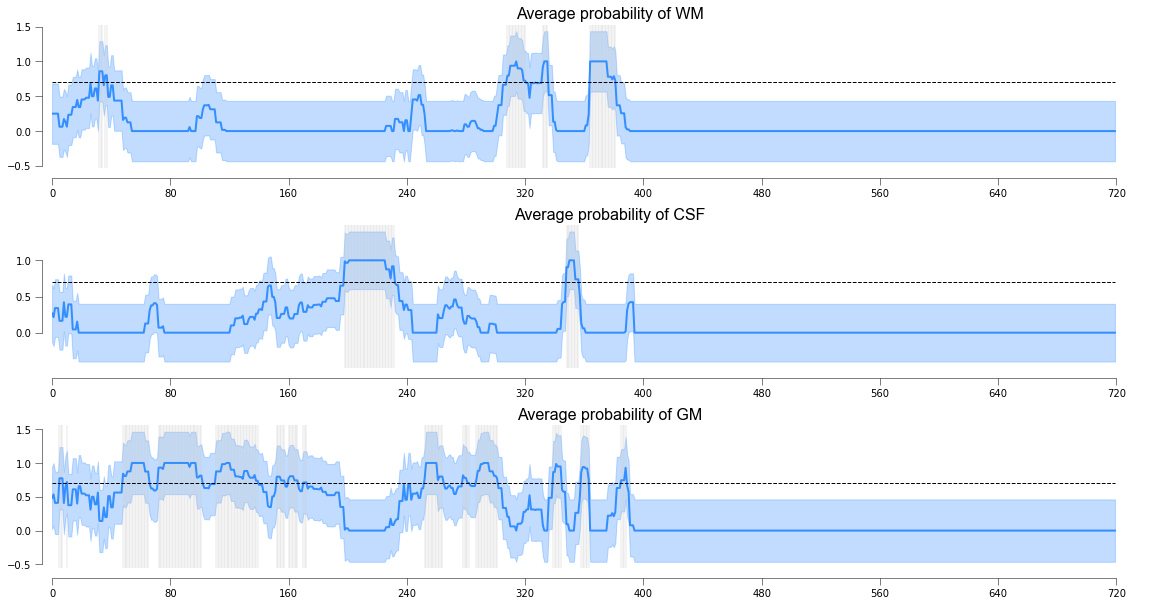

In [82]:
# Load data
sub         = '003'
ses         = 4
task        = "task-pRF"
run         = [4,5,6]
func_dir    = opj(base_dir, f"sub-{sub}", f"ses-{ses}", "func")
anat_dir    = opj(base_dir, f"sub-{sub}", f"ses-{ses}", "anat")
prf_new     = opj(base_dir, 'derivatives', 'prf', f"sub-{sub}", f"ses-{ses}")

# files
run_files   = utils.get_file_from_substring([f"{task}"], func_dir)
func_file   = [utils.get_file_from_substring([f"run-{i}", "bold.mat"], func_dir) for i in run]
ref_slices  = [utils.get_file_from_substring(["acq-1slice", f"run-{i}", "nii.gz"], anat_dir) for i in run]
log_dir     = "/data1/projects/MicroFunc/Jurjen/projects/hemifield/sourcedata/sub-003/ses-4/sub-003_ses-4_task-pRF_run-imgs"

# get transformation files
trafo = utils.get_file_from_substring(f"ses{ses}_rec-motion1", opj(deriv_dir, 'pycortex', f"sub-{sub}", 'transforms'))
trafo_run   = [utils.get_file_from_substring(f"to-run{i}", anat_dir) for i in run]

# initiate object
window = 19
order = 3

fitter_obj = fitting.FitLines(func_files=func_file,
                              low_pass=True,
                              log_dir=log_dir,
                              baseline_duration=20,
                              iter_duration=240,
                              n_iterations=2,
                              acompcor=True,
                              ref_slice=ref_slices,
                              filter_pca=0.22,
                              ses1_2_ls=trafo,
                              run_2_run=trafo_run,                       
                              poly_order=order,                              
                              rsq_threshold=0,
                              voxel_cutoff=300,
                              verbose=True,
                              standardization='psc',
                              output_base=f"sub-{sub}_ses-{ses}_{task}_run-hrf",
                              output_dir=prf_new,                              
                              save_as=opj(anat_dir, f"sub-{sub}_ses-{ses}"))                              

In [83]:
# limit processing to ribbon voxels
ribbon_data = fitter_obj.avg_iters_no_baseline[:,359:364]
print(ribbon_data.shape)

(2286, 5)


In [84]:
# prepare design
fitter_obj.prepare_design()

Using existing design matrix: /data1/projects/MicroFunc/Jurjen/projects/hemifield/derivatives/prf/sub-003/ses-4/sub-003_ses-4_task-pRF_run-hrf_desc-design_matrix.npy
Design matrix has shape: (270, 270, 2286)


In [85]:
# fit DN-model without HRF
stage1 = prf.pRFmodelFitting(ribbon_data.T, 
                             design_matrix=fitter_obj.design, 
                             TR=fitter_obj.TR, 
                             model='norm', 
                             stage='grid+iter', 
                             verbose=True,
                             fit_hrf=False)
stage1.fit()

# fit HRF after DN-fit
stage2 = prf.pRFmodelFitting(ribbon_data.T, 
                             design_matrix=fitter_obj.design, 
                             TR=fitter_obj.TR, 
                             model='norm', 
                             stage='grid+iter', 
                             verbose=True,
                             fit_hrf=True,
                             previous_gaussian_fitter=stage1.norm_fitter)
stage2.fit()

Setting rsq-threshold to default value: 0.1
Starting gauss grid fit at 2022/05/28 15:38:23
Gaussian gridfit completed at 2022/05/28 15:39:35. voxels/vertices above 0.1: 5 out of 5
Gridfit took 0:01:11.322477
Mean rsq>0.1: 0.58
Starting gauss iterfit at 2022/05/28 15:39:35
Gaussian iterfit completed at 2022/05/28 15:43:36. Mean rsq>0.1: 0.58
Iterfit took 0:04:01.416902
Using settings file: /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/20220528_model-norm_desc-settings.yml
Starting norm grid fit at 2022/05/28 15:43:37


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   31.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   39.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   39.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   39.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   39.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   39.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   39.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   39.7s finished


Norm gridfit completed at 2022/05/28 15:44:17. Mean rsq>0.1: 0.64
Gridfit took 0:00:39.664493
Starting norm iterfit at 2022/05/28 15:44:17
Norm iterfit completed at 2022/05/29 23:23:21. Mean rsq>0.1: 0.65
Iterfit took 1 day, 7:39:04.031003
Setting rsq-threshold to default value: 0.1
Using settings file: /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/20220529_model-norm_desc-settings.yml
Starting norm grid fit at 2022/05/29 23:23:55


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   24.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   32.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   40.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   40.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   40.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   40.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   40.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   40.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   40.1s finished


Norm gridfit completed at 2022/05/29 23:24:35. Mean rsq>0.1: 0.62
Gridfit took 0:00:40.106249
Starting norm iterfit at 2022/05/29 23:24:35
Norm iterfit completed at 2022/05/31 08:31:02. Mean rsq>0.1: 0.65
Iterfit took 1 day, 9:06:27.299145


In [89]:
import pandas as pd
stage1_df = pd.DataFrame(stage1.norm_iter)
stage2_df = pd.DataFrame(stage2.norm_iter)

print(stage1_df)
print(stage2_df)

          0         1         2          3         4         5         6  \
0  4.860668  2.421699  1.671991  14.294919 -0.366318  8.909813  1.901897   
1  4.501036 -0.013780  1.992756   0.822349 -0.340670  0.516966  2.545483   
2  4.294942 -1.202894  2.335649   0.501748 -0.274122  0.057144  2.395802   
3  4.263307 -1.546224  2.458316   0.120150 -0.266414  0.040717  2.823707   
4  4.699183  0.221529  2.100364   0.137979 -0.286572  0.102291  2.530647   

              7          8         9  
0  1.008039e-11   0.000001  0.656060  
1  1.037857e-02   7.565155  0.637288  
2  2.620230e+01   3.514695  0.624158  
3  1.376603e+01  10.282095  0.659828  
4  3.930895e-02   9.827373  0.684865  
         0         1         2          3         4          5          6   \
0  4.893472  2.549337  1.631269  51.625396 -0.367917  31.480240   1.849437   
1  4.509172  0.023147  1.991458   0.692821 -0.341134   0.437186   2.533499   
2  4.280428 -1.244371  2.328055   0.135541 -0.272355   0.014451   2.382921 

In [87]:
import pandas as pd
pd.DataFrame(stage2.norm_iter)

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.893472,2.549337,1.631269,51.625396,-0.367917,31.480240,1.849437,2.886638e-11,0.000001,0.790226,0.0,0.657606
1,4.509172,0.023147,1.991458,0.692821,-0.341134,0.437186,2.533499,1.153380e-02,6.344376,0.981752,0.0,0.637297
2,4.280428,-1.244371,2.328055,0.135541,-0.272355,0.014451,2.382921,7.013060e+00,0.869365,1.117541,0.0,0.624613
3,4.284234,-2.064942,2.906977,0.260422,-0.267414,0.084786,44.127927,1.296756e+01,65.484226,1.093731,0.0,0.659588
4,4.776210,0.572233,2.108841,0.165388,-0.290065,0.125820,2.491248,2.186220e-02,10.101830,0.819639,0.0,0.685951


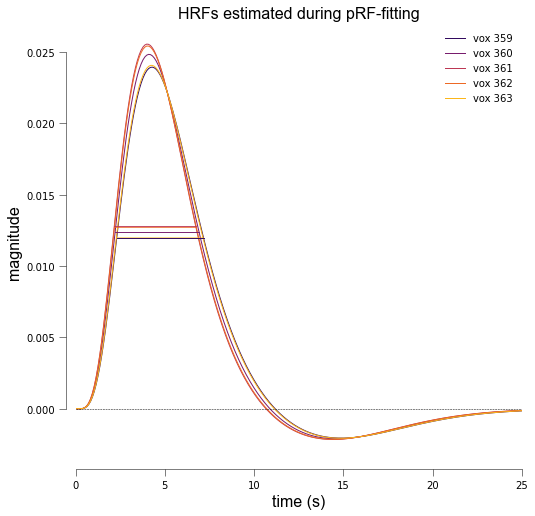

In [90]:
fig,axs = plt.subplots(figsize=(8,8))
hrfs = [stage2.norm_model.create_hrf(hrf_params=[1,*stage2.norm_iter[ii,-3:-1]]).T for ii in range(ribbon_data.shape[-1])]
plotting.LazyPlot(hrfs, 
                  labels=[f"vox {ii}" for ii in range(359,364)], 
                  xx=np.arange(0,40,stage2.TR),
                  axs=axs, 
                  sns_trim=True,
                  font_size=16,
                  line_width=1,
                  x_lim=[0,25],
                  add_hline='default',
                  cmap='inferno',
                  x_label="time (s)",
                  y_label="magnitude",
                  title="HRFs estimated during pRF-fitting")

# get fwhm
colors = sns.color_palette('inferno', len(hrfs))
fwhm_objs = []
for hrf in hrfs:
    fwhm_objs.append(utils.FWHM(np.arange(0,40,stage2.TR), hrf))

    # heights need to be adjusted for by axis length 
    xlim = axs.get_xlim()
    tot = sum(list(np.abs(xlim)))
    for ix, ii in enumerate(fwhm_objs):
        start = (ii.hmx[0]-xlim[0])/tot
        axs.axhline(ii.half_max, xmin=start, xmax=start+ii.fwhm/tot, color=colors[ix], linewidth=0.5)

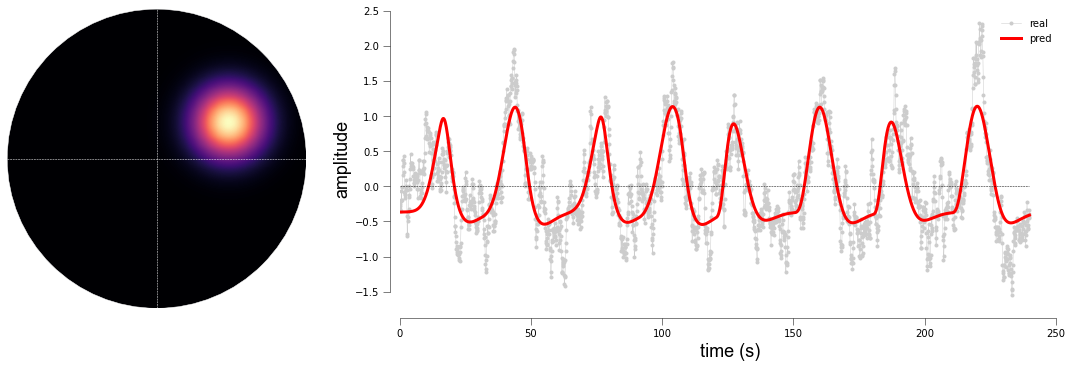

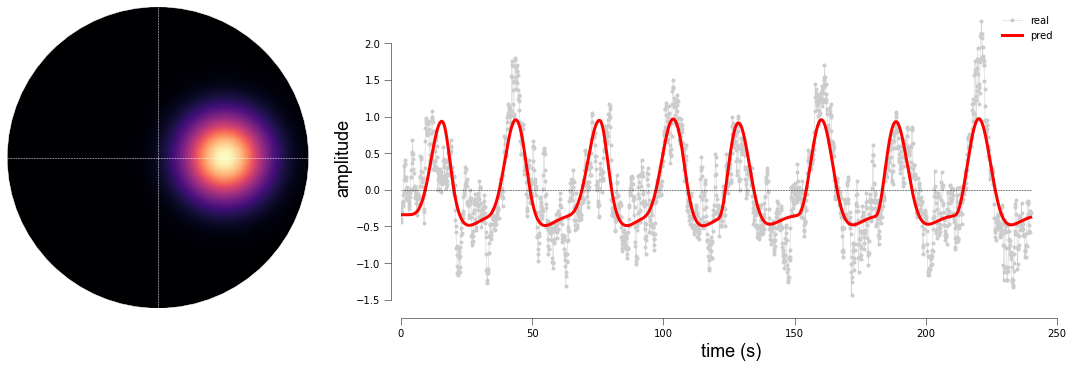

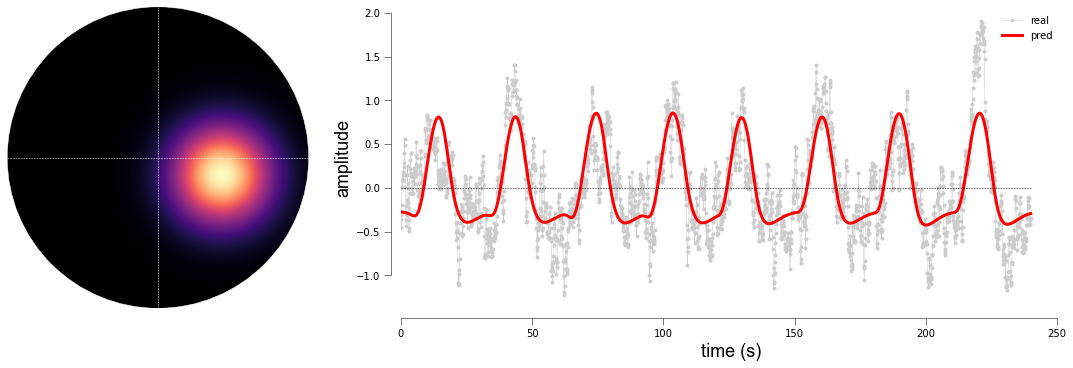

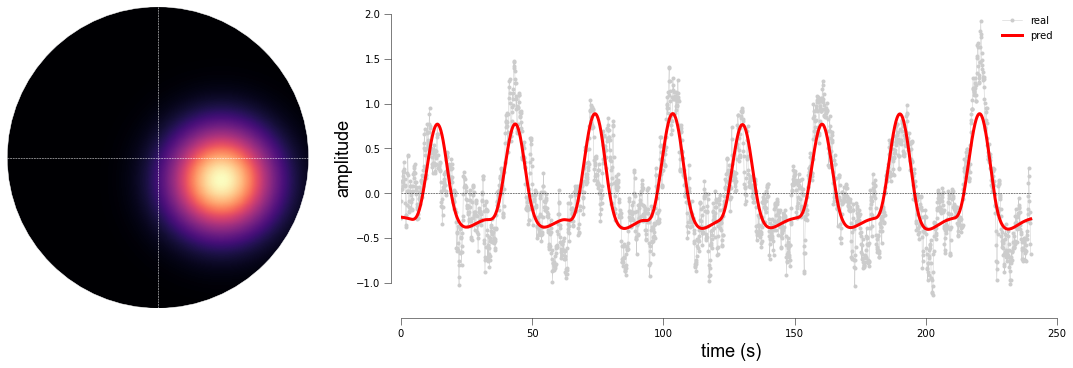

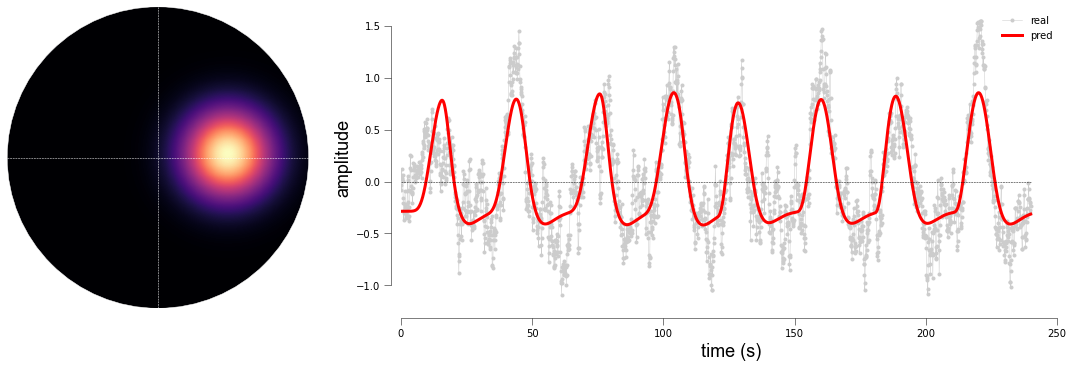

In [97]:
for vox_id in range(ribbon_data.shape[1]):
    stage1.plot_vox(vox_nr=vox_id, model='norm', axis_type='time')

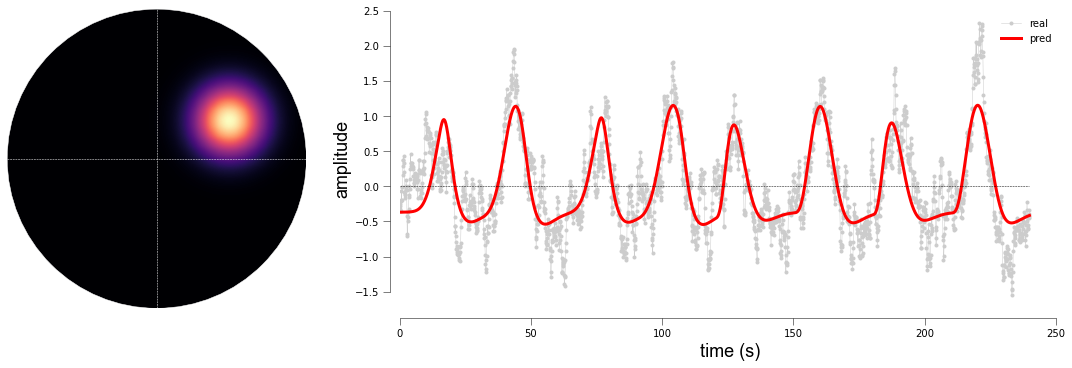

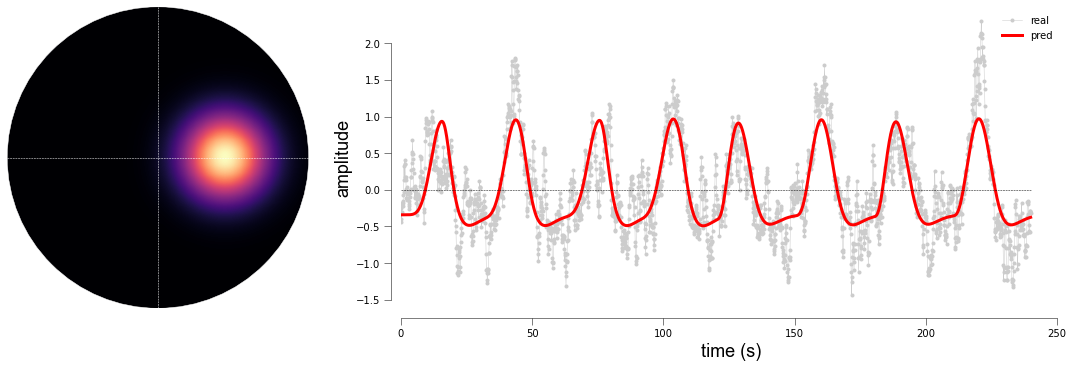

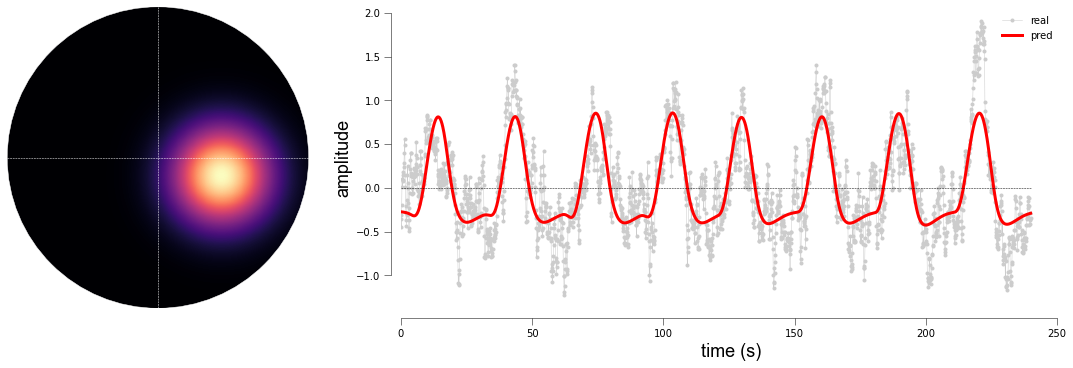

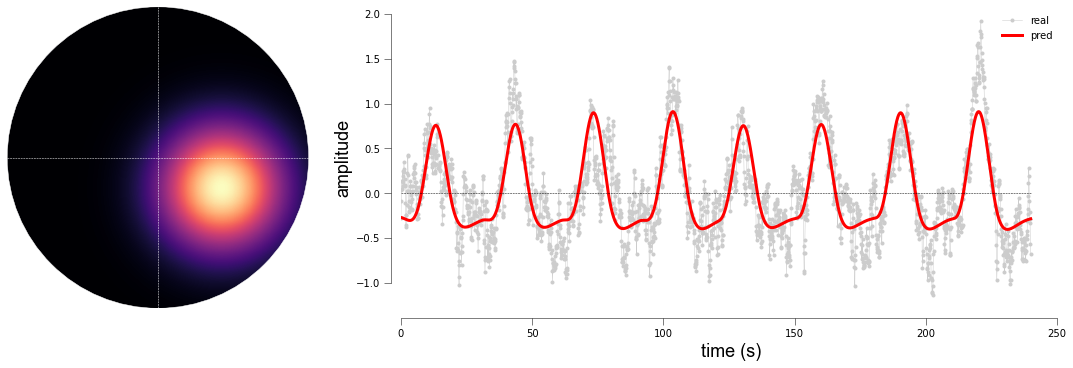

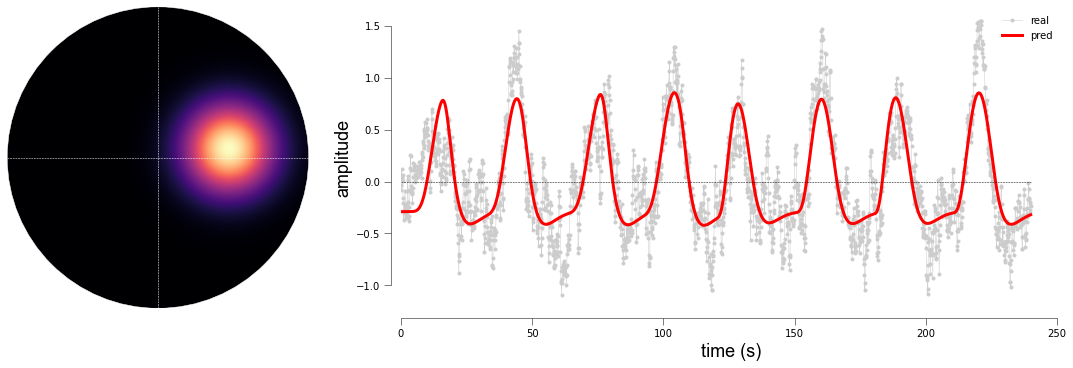

In [96]:
for vox_id in range(ribbon_data.shape[1]):
    stage2.plot_vox(vox_nr=vox_id, model='norm', axis_type='time')

In [104]:
for ix,stage in enumerate([stage1, stage2]):
    
    base = f'stage{ix+1}'

    stage.output_dir = prf_new
    stage.output_base = base
    stage.save_params(model='norm', stage='iter', predictions=True)

Save iter-fit parameters in /data1/projects/MicroFunc/Jurjen/projects/hemifield/derivatives/prf/sub-003/ses-4/stage1_model-norm_stage-iter_desc-prf_params.npy
Save iter-fit predictions in /data1/projects/MicroFunc/Jurjen/projects/hemifield/derivatives/prf/sub-003/ses-4/stage1_model-norm_stage-iter_desc-predictions.npy
Save iter-fit parameters in /data1/projects/MicroFunc/Jurjen/projects/hemifield/derivatives/prf/sub-003/ses-4/stage2_model-norm_stage-iter_desc-prf_params.npy
Save iter-fit predictions in /data1/projects/MicroFunc/Jurjen/projects/hemifield/derivatives/prf/sub-003/ses-4/stage2_model-norm_stage-iter_desc-predictions.npy
